# K Means Clustering

## Import Libraries

In [1]:
import numpy as np  
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt 

# Import Data

In [2]:
customer_data = pd.read_excel('C:/Users/aksin52/Documents/Machine Learning Express/Introduction to Machine Learning/Marketing Analytics Specialization/Part 5 - Clustering Algorithms/Data/card_customer_data.xlsx')

# Checking the Data

In [3]:
customer_data.shape  

(3078, 11)

In [4]:
customer_data.head()

,CLIENTNUM,Education_Level,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Utilization_Ratio,Total_Trans_Amt,Total_Trans_Ct
0,769911858,High School,Blue,34,3,4,3313.0,2517,0.760,1171,20
1,713061558,Graduate,Blue,36,3,1,4010.0,1247,0.311,1088,24
2,818906208,High School,Silver,27,2,2,29081.0,1396,0.048,1538,36
3,710599683,College,Blue,36,3,6,11751.0,0,0.000,1539,17
4,712396908,Graduate,Blue,48,5,2,2436.0,680,0.279,1570,29


In [5]:
customer_data.dtypes

CLIENTNUM                     int64
Education_Level              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Utilization_Ratio       float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
dtype: object

# Dropping ID 

In [6]:
data=customer_data.drop(['CLIENTNUM'],axis=1)
data.head()

,Education_Level,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Utilization_Ratio,Total_Trans_Amt,Total_Trans_Ct
0,High School,Blue,34,3,4,3313.0,2517,0.760,1171,20
1,Graduate,Blue,36,3,1,4010.0,1247,0.311,1088,24
2,High School,Silver,27,2,2,29081.0,1396,0.048,1538,36
3,College,Blue,36,3,6,11751.0,0,0.000,1539,17
4,Graduate,Blue,48,5,2,2436.0,680,0.279,1570,29


# Split features into Numerical and Categorical

In [7]:
num=data.select_dtypes(include='number')
char=data.select_dtypes(include='object')

In [8]:
num.dtypes

Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Utilization_Ratio       float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
dtype: object

In [9]:
char.dtypes

Education_Level    object
Card_Category      object
dtype: object

# Capping and Flooring of outliers

In [10]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [11]:
num=num.apply(lambda x : outlier_cap(x))

# Missing Value Analysis

In [12]:
num.isnull().mean()

Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Utilization_Ratio       0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
dtype: float64

In [13]:
# Since no Missing Values are present in the data, we need not proceed with Missing Value Imputation process

# Building Derived Feature - Avg Spend per Transaction

In [14]:
num['avg_spend']=num['Total_Trans_Amt']/num['Total_Trans_Ct']

In [15]:
num.head()

,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Utilization_Ratio,Total_Trans_Amt,Total_Trans_Ct,avg_spend
0,34.0,3.0,4.0,3313.0,2517.0,0.760,1171.0,20.0,58.550000
1,36.0,3.0,1.0,4010.0,1247.0,0.311,1088.0,24.0,45.333333
2,27.0,2.0,2.0,29081.0,1396.0,0.048,1538.0,36.0,42.722222
3,36.0,3.0,5.0,11751.0,0.0,0.000,1539.0,19.0,81.000000
4,48.0,5.0,2.0,2436.0,680.0,0.279,1570.0,29.0,54.137931


# Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
stdsc=StandardScaler()
num_std=pd.DataFrame(stdsc.fit_transform(num),index=num.index,columns=num.columns).add_suffix('_std')

In [17]:
num_std.head()

,Months_on_book_std,Total_Relationship_Count_std,Months_Inactive_12_mon_std,Credit_Limit_std,Total_Revolving_Bal_std,Avg_Utilization_Ratio_std,Total_Trans_Amt_std,Total_Trans_Ct_std,avg_spend_std
0,-0.227121,-0.481448,1.737885,-0.581932,1.667223,1.762509,-0.955841,-1.901937,-0.157105
1,0.023041,-0.481448,-1.395805,-0.505852,0.110202,0.136021,-0.980499,-1.731114,-0.657095
2,-1.102689,-1.124354,-0.351242,2.230732,0.292876,-0.816688,-0.846814,-1.218643,-0.755874
3,0.023041,-0.481448,2.782448,0.339104,-1.418621,-0.990566,-0.846517,-1.944643,0.692184
4,1.524015,0.804363,-0.351242,-0.677659,-0.584940,0.020102,-0.837308,-1.517584,-0.324015


In [18]:
num_std.shape

(3078, 9)

# Checking for Correlations

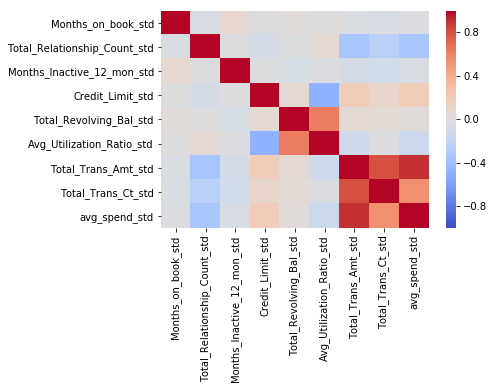

In [19]:
import seaborn as sns
sns.heatmap(num_std.corr(),vmin=-1,vmax=1,center=0,cmap='coolwarm')

# Drop Correlated Variables

In [20]:
num_std=num_std.drop(['Credit_Limit_std','Total_Revolving_Bal_std','Total_Trans_Amt_std','Total_Trans_Ct_std','Total_Relationship_Count_std'],axis=1)

# Checking for Correlations

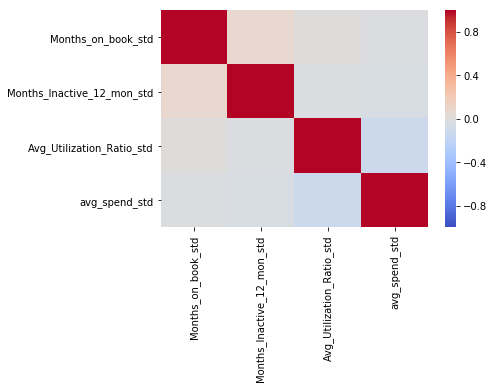

In [21]:
import seaborn as sns
sns.heatmap(num_std.corr(),vmin=-1,vmax=1,center=0,cmap='coolwarm')

## WCSS Graph

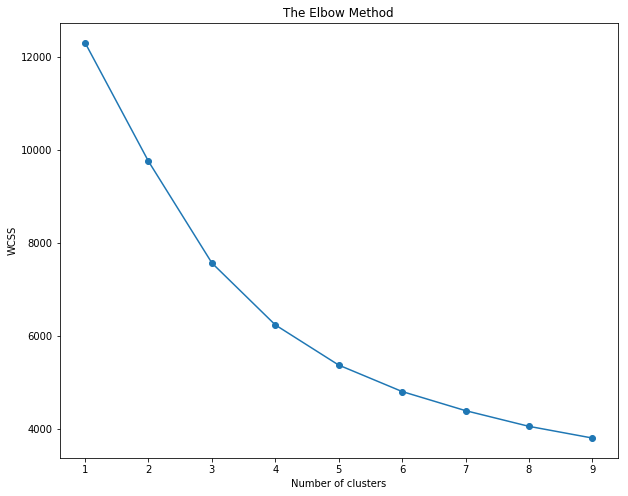

In [22]:
# find the appropriate cluster number
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
K = range(1, 10)
for i in K:
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(num_std)
    wcss.append(kmeans.inertia_)
plt.plot(K, wcss,'o-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Building the clusters 

In [23]:
# Fitting K-Means to the dataset
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(num_std)
num_std['cluster_label'] = pd.DataFrame(y_kmeans)

In [24]:
from sklearn.metrics import silhouette_score
cluster_label=num_std['cluster_label']
silhouette_avg = silhouette_score(num_std, cluster_label)
silhouette_avg

0.35082069341982564

In [25]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(num_std,cluster_label)

1.084755399548617

In [26]:
num['cluster_label']=num_std['cluster_label']

In [27]:
num['cluster_label'].value_counts()

2    976
3    886
1    872
0    344
Name: cluster_label, dtype: int64

In [28]:
num.groupby('cluster_label').agg(['mean'])

,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Utilization_Ratio,Total_Trans_Amt,Total_Trans_Ct,avg_spend
,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster_label,,,,,,,,,
0,34.886628,2.363372,2.212209,14896.930233,1247.139535,0.147590,12330.366715,96.482558,127.191356
1,35.653670,3.965596,2.311927,2628.869495,1685.551606,0.650789,3547.165860,62.892202,55.406304
2,35.545082,3.985656,1.562500,10420.048873,944.859631,0.124890,3405.618658,60.810451,54.389051
3,36.634312,3.812641,3.260722,10180.966366,835.882619,0.114593,3215.736287,57.853273,54.004144


# joining the dataframes Num and Char

In [29]:
data_all=pd.concat([num,char],axis=1,join="inner")

In [30]:
data_all.head()

,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Utilization_Ratio,Total_Trans_Amt,Total_Trans_Ct,avg_spend,cluster_label,Education_Level,Card_Category
0,34.0,3.0,4.0,3313.0,2517.0,0.760,1171.0,20.0,58.550000,1,High School,Blue
1,36.0,3.0,1.0,4010.0,1247.0,0.311,1088.0,24.0,45.333333,2,Graduate,Blue
2,27.0,2.0,2.0,29081.0,1396.0,0.048,1538.0,36.0,42.722222,2,High School,Silver
3,36.0,3.0,5.0,11751.0,0.0,0.000,1539.0,19.0,81.000000,3,College,Blue
4,48.0,5.0,2.0,2436.0,680.0,0.279,1570.0,29.0,54.137931,2,Graduate,Blue


# Cluster Profiling

In [31]:
pd.crosstab(index=data_all['cluster_label'], columns=data_all['Card_Category'],values=data_all['Card_Category'],aggfunc='count')

Card_Category,Blue,Gold,Platinum,Silver
cluster_label,,,,
0,266.0,17.0,5.0,56.0
1,872.0,NaN,NaN,NaN
2,895.0,10.0,6.0,65.0
3,833.0,7.0,1.0,45.0


In [32]:
pd.crosstab(index=data_all['cluster_label'], columns=data_all['Card_Category'],values=data_all['Total_Trans_Amt'],aggfunc='mean')

Card_Category,Blue,Gold,Platinum,Silver
cluster_label,,,,
0,12335.156391,12182.823529,13161.800000,12278.170536
1,3547.165860,NaN,NaN,NaN
2,3364.793084,4327.700000,4444.666667,3729.984615
3,3184.493709,4747.428571,5418.000000,3506.868667


In [33]:
pd.crosstab(index=data_all['cluster_label'], columns=data_all['Card_Category'],values=data_all['Total_Trans_Ct'],aggfunc='mean')

Card_Category,Blue,Gold,Platinum,Silver
cluster_label,,,,
0,95.744361,97.529412,107.2,98.714286
1,62.892202,NaN,NaN,NaN
2,60.520670,70.700000,63.0,63.076923
3,57.474190,70.285714,65.0,62.777778


## Plotting the Cluster Profiles

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


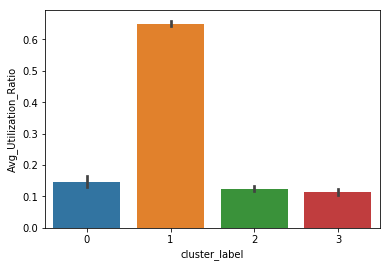

In [34]:
import seaborn as sns
from numpy import mean
sns.barplot(x='cluster_label', y="Avg_Utilization_Ratio",data=data_all, estimator=mean )

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


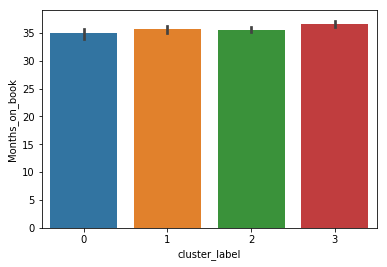

In [35]:
sns.barplot(x='cluster_label', y="Months_on_book",data=data_all, estimator=mean )

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


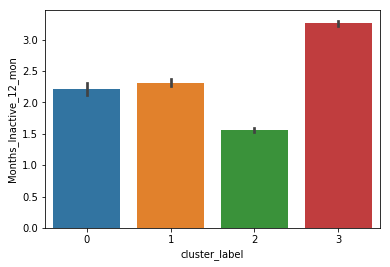

In [36]:
sns.barplot(x='cluster_label', y="Months_Inactive_12_mon",data=data_all, estimator=mean ) 

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


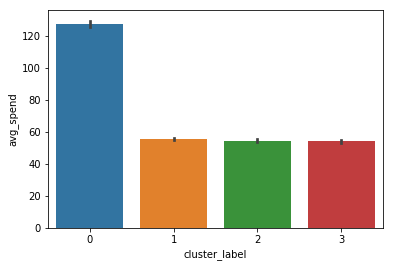

In [37]:
sns.barplot(x='cluster_label', y="avg_spend",data=data_all, estimator=mean )

# Providing the final output

In [38]:
data_cluster_0=data_all.loc[data_all['cluster_label']==0]
data_cluster_0.shape

(344, 12)

In [39]:
data_cluster_1=data_all.loc[data_all['cluster_label']==1]
data_cluster_1.shape

(872, 12)

In [40]:
data_cluster_2=data_all.loc[data_all['cluster_label']==2]
data_cluster_2.shape

(976, 12)

In [41]:
data_cluster_3=data_all.loc[data_all['cluster_label']==3]
data_cluster_3.shape

(886, 12)

In [42]:
data_cluster_0.to_csv('C:/Users/aksin52/Documents/Machine Learning Express/Introduction to Machine Learning/Marketing Analytics Specialization/Part 5 - Clustering Algorithms/Data/data_cluster_3.csv')